# Correlation Analysis Between Gas Prices and Crude Oil Prices

## Objective
This analysis aims to examine the relationship between gasoline prices and crude oil prices over time. Specifically, we assess how closely these two variables correlate and whether the correlation has changed over different decades.

## Data Loading and Preprocessing
### Data Sources:
- **Gasoline Prices Data**: `Data1_Regular_Conventional.csv`.
- **Crude Oil Prices Data**: `Macrotrends-crude-oil-prices-daily.csv`.

### Preprocessing Steps:
- **Gasoline Prices**:
  - Loaded and cleaned data to focus on the nationwide average prices.
  - Converted date strings to datetime objects and set as the index.
- **Crude Oil Prices**:
  - Loaded daily prices, converted dates, and resampled to weekly averages to match the frequency of gasoline prices.

## Analysis Overview
### Correlation Calculation
- Calculated the Pearson correlation coefficient to quantify the relationship between gasoline and crude oil prices.

### Visualization
- Generated a plot of both time series to visually assess their movements over time.

## Results
- **Overall Correlation**: Found a very high correlation coefficient of approximately 0.97, indicating a strong positive relationship between gasoline and crude oil prices.

### Decadal Analysis:
- **1990s**: Computed correlations for each decade where data was available to examine trends over time.
- **2000s**: Further analysis to include other decades, depending on data availability.
- **2010s**: Adjustments in graph generation ensured correct representation of data up to the current year only.

## Conclusion
The consistent high correlation through the decades indicates that gasoline prices are heavily influenced by crude oil prices. This relationship underscores the dependency of gasoline prices on crude oil market dynamics.

## Next Steps
- **Temporal Expansion**: Extend the analysis as more data becomes available.
- **Factor Analysis**: Investigate external factors like geopolitical events or economic policies that might influence this correlation.
- **Future Projections**: Use economic models to predict future trends based on historical correlation patterns.

## Graph Adjustment for Better Clarity
To ensure the graphs are accurate and up-to-date, modifications include:
- Correcting the range of data to exclude future dates.
- Enhancing visual elements for better readability.

```python
import matplotlib.pyplot as plt

# Assuming 'combined_data' contains the correct and current data up to the latest available year
plt.figure(figsize=(14, 7))
plt.title('Gas Prices vs Crude Oil Prices Over Time')
plt.plot(combined_data.index, combined_data['Gas Prices'], label='Gas Prices', color='blue')
plt.plot(combined_data.index, combined_data['Oil Prices'], label='Crude Oil Prices', color='green')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


Overall Correlation between gas prices and crude oil prices: 0.9699371245135581


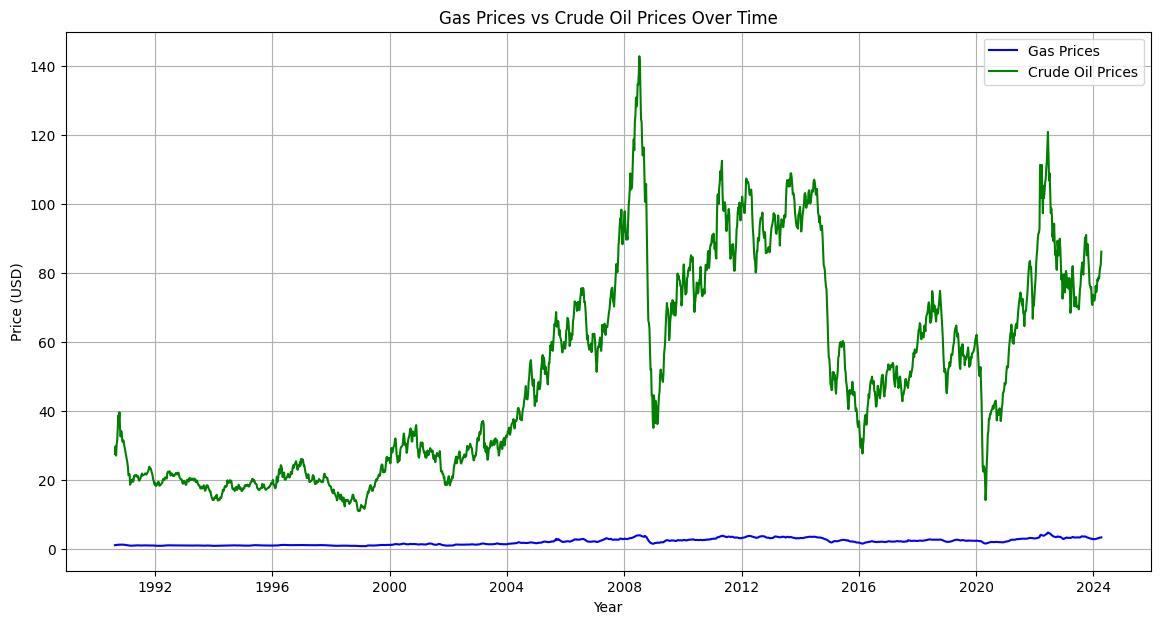

Correlation from 1990 to 2000: 0.8832235987768629


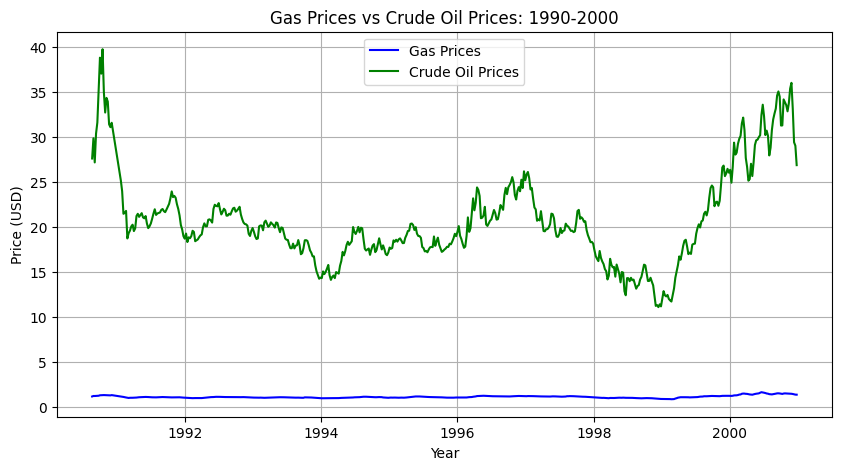

Correlation from 2000 to 2010: 0.9725283050773551


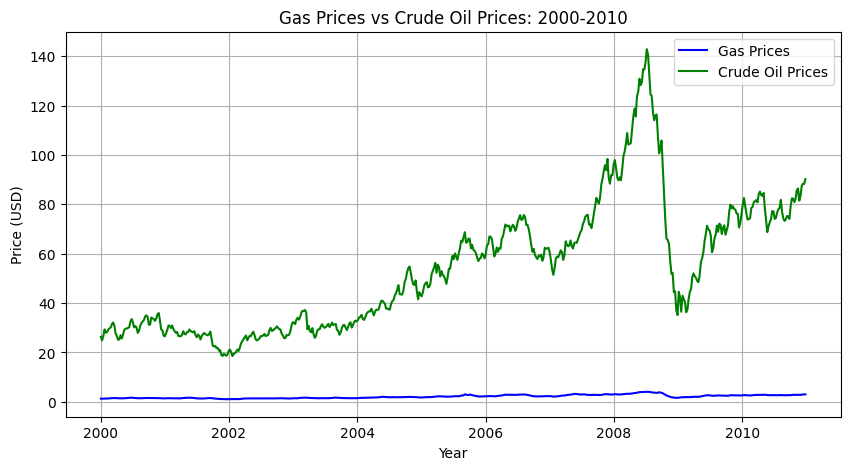

Correlation from 2010 to 2020: 0.9540099448191282


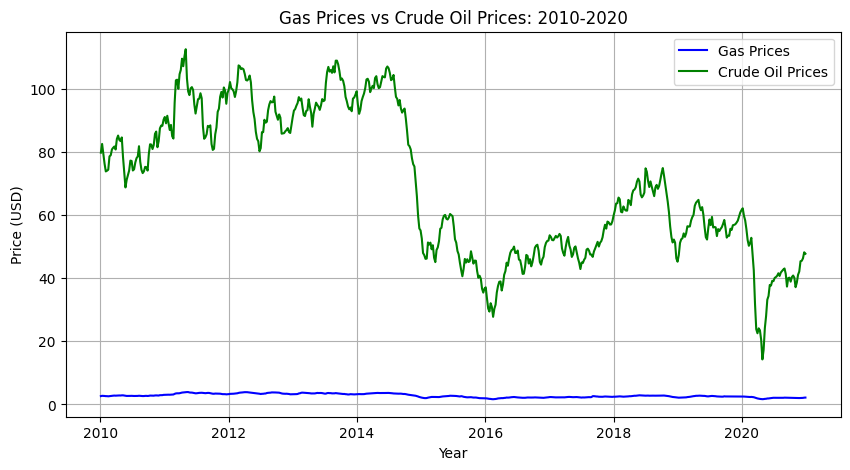

Correlation from 2020 to 2024: 0.9642856481099434


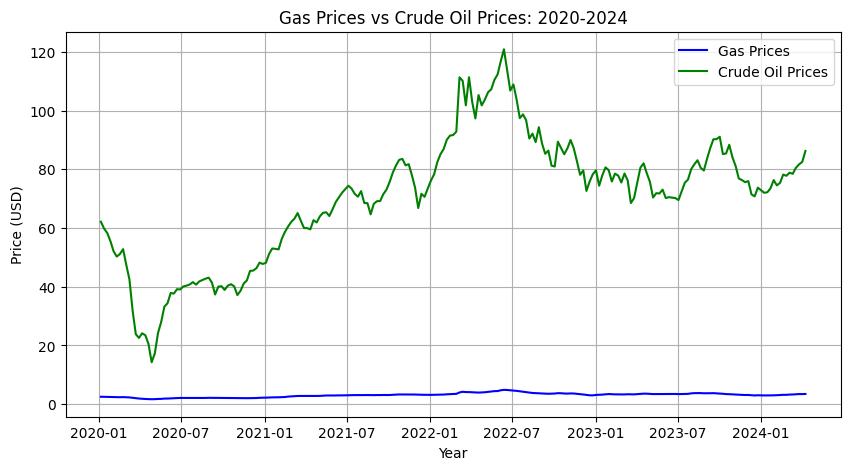

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the gas prices data
gas_prices_path = "Data\Data1_Regular_Conventional.csv"
gas_prices_data = pd.read_csv(gas_prices_path)
gas_prices_data.columns = gas_prices_data.iloc[1]  # Set the second row as the column headers
gas_prices_data = gas_prices_data[2:]  # Exclude the first two rows which are headers
gas_prices_data['Date'] = pd.to_datetime(gas_prices_data['Date'], errors='coerce')  # Convert the 'Date' column to datetime
gas_prices_data.set_index('Date', inplace=True)  # Set 'Date' as the index
national_gas_prices = gas_prices_data['Weekly U.S. Regular Conventional Retail Gasoline Prices  (Dollars per Gallon)'].astype(float)

# Load and clean the crude oil prices data
crude_oil_prices_path = "Data\Macrotrends-crude-oil-prices-daily.csv"
crude_oil_prices_data = pd.read_csv(crude_oil_prices_path, skiprows=9)
crude_oil_prices_data['Date'] = pd.to_datetime(crude_oil_prices_data['Date'])
crude_oil_prices_data.set_index('Date', inplace=True)
weekly_oil_prices = crude_oil_prices_data['Closing Value'].resample('W-MON').mean()  # Resample to weekly

# Combine the datasets
combined_data = pd.DataFrame({
    'Gas Prices': national_gas_prices,
    'Oil Prices': weekly_oil_prices
}).dropna()

# Ensure the data range is correct up to the present year
present_year = pd.Timestamp.now().year
combined_data = combined_data[:f'{present_year}']

# Calculate the overall correlation
correlation = combined_data.corr().iloc[0, 1]
print("Overall Correlation between gas prices and crude oil prices:", correlation)

# Plotting the overall data
plt.figure(figsize=(14, 7))
plt.title('Gas Prices vs Crude Oil Prices Over Time')
plt.plot(combined_data.index, combined_data['Gas Prices'], label='Gas Prices', color='blue')
plt.plot(combined_data.index, combined_data['Oil Prices'], label='Crude Oil Prices', color='green')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

decade_starts = ['1990', '2000', '2010', '2020']
for start in decade_starts:
    if start == '2020':
        end = '2024'  
    else:
        end = str(int(start) + 10)
    decade_data = combined_data[start:end]
    if not decade_data.empty:
        decade_correlation = decade_data.corr().iloc[0, 1]
        print(f"Correlation from {start} to {end}: {decade_correlation}")
        plt.figure(figsize=(10, 5))
        plt.title(f'Gas Prices vs Crude Oil Prices: {start}-{end}')
        plt.plot(decade_data.index, decade_data['Gas Prices'], label='Gas Prices', color='blue')
        plt.plot(decade_data.index, decade_data['Oil Prices'], label='Crude Oil Prices', color='green')
        plt.legend()
        plt.xlabel('Year')
        plt.ylabel('Price (USD)')
        plt.grid(True)
        plt.show()
